0.11 sold 1
0.65 sold 2
0.72 sold 4
0.77 sold 2
0.81 sold 2
1.04 sold 2
1.19 sold 3
1.27 sold 1
1.31 sold 3
1.36 sold 3
1.36 Place order for 23
1.59 sold 4
1.59 Place order for 27
1.71 sold 2
1.71 Place order for 29
1.74 Sold 0 (out fo stock)
1.74 Place order for 30
2.04 Sold 0 (out fo stock)
2.04 Place order for 30
2.73 Sold 0 (out fo stock)
2.73 Place order for 30
2.75 Sold 0 (out fo stock)
2.75 Place order for 30
3.17 Sold 0 (out fo stock)
3.17 Place order for 30
3.36 Received order 30 in inventory
3.52 sold 1
3.53 sold 4
3.54 sold 1
3.56 sold 4
3.59 Received order 20 in inventory
3.71 Received order 20 in inventory
3.74 Received order 20 in inventory
3.78 sold 2
3.94 sold 1
4.00 sold 4
4.04 Received order 13 in inventory
4.24 sold 1
4.34 sold 4
4.34 Place order for 22
4.62 sold 4
4.62 Place order for 26
4.73 Received order 30 in inventory
4.75 Received order 30 in inventory
4.84 sold 2
4.90 sold 4
4.95 sold 2


Text(0, 0.5, 'Inventory level')

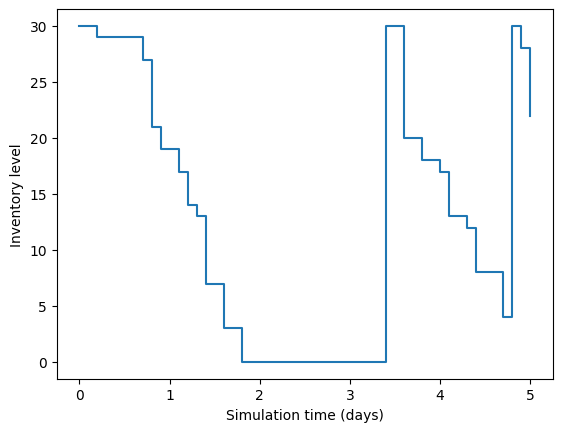

In [30]:

import simpy
import numpy as np
def warehouse_run(env, order_cutoff, order_target): #FUNCIONAMIENTO DEL DEPOSITO TOMANDO 3 ARGUMENTOS, ENV PARA EL ENTORNO DE LA SIMULACION
    global inventory, balance, num_oredered    # order_cutoff es para el punto de reorden y order_target cantidad objetivo  # Se inicializan como variables globales
    inventory = order_target
    balance = 0.0
    num_ordered = 0
    while True:
        interarrival=generate_interarrival()  #Genera un tiempo de llegada
        yield env.timeout(interarrival) #Se espera el tiempo obtenido en interarrivañ
        balance -=  inventory*2*interarrival  # Se actualiza el saldo restando el costo de mantener el inventario en el almacen ese tiempo
        demand=generate_demand()  #genera una demanda entre 1 y 5
        """ Si la demanda es menor que el inventario actual, se venden los productos correspondientes y se actualiza el saldo y el inventario.
        Si la demanda es mayor o igual al inventario, se venden todos los productos disponibles y se muestra un mensaje indicando que no hay suficiente inventario."""
        if demand < inventory:
            balance += 100*demand
            inventory-=demand
            print('{:.2f} sold {}'.format(env.now,demand))
        else:
            balance += 100*inventory
            inventory =0
            print('{:.2f} Sold {} (out fo stock)'.format(env.now,inventory))
        """Si el inventario es menor que el punto de reorden (order_cutoff) y no hay pedidos en proceso, se llama a la función handle_order para realizar un pedido."""
        if inventory< order_cutoff and num_ordered==0:
            env.process(handle_order(env, order_target))
####
"""Simula el proceso de realizar un pedido. Se calcula la cantidad de productos a pedir (num_ordered), se actualiza el saldo y se espera un tiempo de 2.0 unidades(dias) utilizando env.timeout(2.0).
 Luego, se recibe el pedido, se actualiza el inventario y se muestra un mensaje indicando que el pedido ha sido recibido."""
def handle_order(env,order_target):
    global inventory,balance, num_ordered
    num_ordered = order_target -inventory
    print('{:.2f} Place order for {}'.format(env.now,num_ordered))
    balance -= 50*num_ordered
    yield env.timeout(2.0)
    inventory +=  num_ordered
    num_ordered = 0
    print('{:.2f} Received order {} in inventory'.format(env.now,inventory))
#Genera valores aleatorios para el tiempo de llegada entre pedidos
def generate_interarrival():
    return np.random.exponential(1./5)
#Genera valores aletorios de la demanda
def generate_demand():
    return np.random.randint(1,5)

#Listas para almacenar datos de observacion
obs_time = []
inventory_level = []
"""Observe se encarga de registrar los datos de observacion en las listas mencionadas anteriormente.
En un bucle infinito, se añade el tiempo actual (env.now) a obs_time y el nivel de inventario actual a inventory_level.
Luego, se espera un tiempo de 0.1 unidades utilizando env.timeout(0.1)."""
def observe(env):
    global inventory
    while True:
        obs_time.append(env.now)
        inventory_level.append(inventory)
        yield env.timeout(0.1)
#SEMILLA ALEATORIA
np.random.seed(0)
#SIMULACION
env = simpy.Environment()
#Crean dos procesos en el entorno de simulacion
env.process(warehouse_run(env,10,30))
env.process(observe(env))
#Se ejecuta la simulacion hasta un tiempo de 5 unidades utilizando
env.run(until=5.0)
#Se muestra un gráfico paso a paso (plt.step()) que representa el nivel de inventario en funcion del tiempo utilizando los datos almacenados en obs_time e inventory_level.
import matplotlib.pyplot as plt
plt.figure()
plt.step(obs_time, inventory_level, where = 'post')
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')

In [5]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
